In [30]:
# wrapper.ipynb - Cell 1

import sys
from pathlib import Path

# Добавляем путь к папке models
sys.path.append(str(Path("/Users/elinakarimova/health-monitoring-app/ml/models")))
import pandas as pd
import joblib


# Add current folder to sys.path so we can import models
sys.path.append(str(Path().resolve() / "models"))

# Imports from your models (assuming .py files)
from models.fatigue_risk_model import create_fatigue_model_dataset, train_fatigue_model
from models.activity_anomaly_model import prepare_activity_data, train_activity_anomaly_model
from models.activity_index import compute_activity_index

# Paths
CSV_PATH = "health_fitness_dataset.csv"  # Path to your CSV
EXPORT_DIR = Path("export")
EXPORT_DIR.mkdir(exist_ok=True)


In [31]:
# wrapper.ipynb - Cell 2
print("=== Preparing data for fatigue risk model ===")
df_fatigue = create_fatigue_model_dataset(CSV_PATH)
df_fatigue.head()


=== Preparing data for fatigue risk model ===
--- Loading dataset from health_fitness_dataset.csv ---
Calculating rolling z-scores and deltas...
Removed 6005 rows with NaNs (initial z-score warm-up).

--- Fatigue label distribution ---
y_target_fatigue
0    0.796713
1    0.203287
Name: proportion, dtype: float64
-------------------------------------------------
--- Dataset ready ---


/Users/elinakarimova/health-monitoring-app/ml/models/fatigue_risk_model.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['y_target_fatigue'] = (


,user_id,y_target_fatigue,steps_total,calories_total,sleep_hours_total,age,gender_numeric,height_cm,weight_kg,z_sleep_7d,z_steps_7d,d_sleep_7d,d_steps_7d
2,1,0,7557,2.6,6.2,56,0.0,165.3,54.2,-0.765392,0.050975,-0.766667,20.333333
3,1,0,11120,10.7,7.2,56,0.0,165.3,54.4,0.211830,1.475814,0.175000,2687.500000
4,1,0,5406,12.7,7.1,56,0.0,165.3,54.7,0.083771,-1.165029,0.060000,-2421.200000
5,1,0,10202,6.8,7.5,56,0.0,165.3,54.9,0.574211,0.943968,0.383333,1979.000000
6,1,0,5912,12.4,6.6,56,0.0,165.3,55.2,-0.692029,-0.941600,-0.442857,-1980.857143


In [32]:
# wrapper.ipynb - Cell 3
print("=== Training fatigue risk model ===")
fatigue_model, fatigue_metrics = train_fatigue_model()

print("\nFatigue model metrics:")
for k, v in fatigue_metrics.items():
    print(f"{k}: {v:.4f}")


=== Training fatigue risk model ===
=== Step 1: Data preparation ===
--- Loading dataset from /Users/elinakarimova/health-monitoring-app/ml/health_fitness_dataset.csv ---
Calculating rolling z-scores and deltas...
Removed 6005 rows with NaNs (initial z-score warm-up).

--- Fatigue label distribution ---
y_target_fatigue
0    0.796713
1    0.203287
Name: proportion, dtype: float64
-------------------------------------------------
--- Dataset ready ---

=== Step 2: Define X, y, groups ===
Features ready: 9 total

=== Step 3: Train/test split ===
Train: 545520 | Test: 136176

=== Step 4: Model training ===


/Users/elinakarimova/health-monitoring-app/ml/models/fatigue_risk_model.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['y_target_fatigue'] = (



🎯 Best model: RF
{
  "acc": 0.9019283867935612,
  "f1": 0.7745040101308569,
  "auc": 0.9592063678215541,
  "precision": 0.7265268626457172,
  "recall": 0.8292656470333007
}

=== Step 5: Export ===
✅ Model exported to /Users/elinakarimova/health-monitoring-app/ml/export/fatigue_model_v1.onnx
✅ Export complete.

Fatigue model metrics:
acc: 0.9019
f1: 0.7745
auc: 0.9592
precision: 0.7265
recall: 0.8293


In [33]:
# wrapper.ipynb - Cell 4
print("=== Preparing data for activity anomaly model ===")
df_anomaly = prepare_activity_data(CSV_PATH)
df_anomaly.head()


=== Preparing data for activity anomaly model ===
Данные подготовлены: 681696 строк после очистки.


,user_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_total,...,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level,gender_numeric,z_steps_7d,z_sleep_7d,d_steps_7d,d_sleep_7d
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,...,110.7,72.9,NaN,Never,0.09,0.0,0.050975,-0.765392,20.333333,-0.766667
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,...,110.7,72.9,NaN,Never,0.21,0.0,1.475814,0.211830,2687.500000,0.175000
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,...,110.7,72.9,NaN,Never,0.33,0.0,-1.165029,0.083771,-2421.200000,0.060000
5,1,2024-01-10,56,F,165.3,54.9,HIIT,31,Medium,6.8,...,110.7,72.9,NaN,Never,0.37,0.0,0.943968,0.574211,1979.000000,0.383333
6,1,2024-01-11,56,F,165.3,55.2,Weight Training,97,High,12.4,...,110.7,72.9,NaN,Never,0.51,0.0,-0.941600,-0.692029,-1980.857143,-0.442857


In [ ]:
# wrapper.ipynb - Cell 5
print("=== Training activity anomaly model ===")
df_anomaly, anomaly_model_path = train_activity_anomaly_model(df_anomaly, EXPORT_DIR)


=== Training activity anomaly model ===

--- Баланс аномалий ---
activity_anomaly
0    0.95
1    0.05
Name: proportion, dtype: float64
✅ Модель сохранена: /Users/elinakarimova/health-monitoring-app/ml/export/activity_anomaly_model.pkl


In [35]:
# wrapper.ipynb - Cell 6
print("=== Computing Activity Index ===")
df_index = compute_activity_index(df_anomaly)
df_index[['user_id', 'date', 'steps_total', 'sleep_hours_total', 'activity_index']].head()


=== Computing Activity Index ===
✅ Activity Index рассчитан для каждого дня.


,user_id,date,steps_total,sleep_hours_total,activity_index
2,1,2024-01-05,7557,6.2,0.76342
3,1,2024-01-07,11120,7.2,1.00000
4,1,2024-01-09,5406,7.1,0.67936
5,1,2024-01-10,10202,7.5,0.98712
6,1,2024-01-11,5912,6.6,0.68472


In [41]:
# === wrapper.ipynb - Cell 7 (final fixed version) ===
print("=== Example predictions (first 5 rows) ===")

FEATURES = [
    'steps_total', 'calories_total', 'sleep_hours_total',
    'age', 'gender_numeric', 'height_cm', 'weight_kg',
    'd_sleep_7d', 'd_steps_7d'
]

# --- Step 1: Ensure we have a valid 'date' column ---
if 'date' not in df_fatigue.columns or df_fatigue['date'].isna().all():
    print("⚠️ 'date' column missing — generating synthetic date ranges per user...")

    df_fatigue = df_fatigue.sort_values('user_id').reset_index(drop=True)
    synthetic_dates = []

    # Create smaller date ranges per user to prevent overflow
    for uid, group in df_fatigue.groupby('user_id'):
        n = len(group)
        start_date = pd.Timestamp("2024-01-01") + pd.Timedelta(days=int(uid))
        user_dates = pd.date_range(start=start_date, periods=n, freq='D')
        synthetic_dates.extend(user_dates)

    df_fatigue['date'] = synthetic_dates

# --- Step 2: Example predictions ---
for i, row in df_fatigue.head(5).iterrows():
    X_sample = row[FEATURES].values.reshape(1, -1)
    fatigue_pred = fatigue_model.predict(X_sample)[0]
    fatigue_proba = fatigue_model.predict_proba(X_sample)[0, 1]

    # Safely get anomaly and index if they exist
    anomaly_flag = df_index.iloc[i]['activity_anomaly'] if 'activity_anomaly' in df_index.columns else None
    activity_score = df_index.iloc[i]['activity_index'] if 'activity_index' in df_index.columns else None


    # Convert to proper date format
    date_value = pd.to_datetime(row['date']).date()

    print(f"User: {int(row['user_id'])} | Date: {date_value}")
    print(f"  Fatigue Risk: {fatigue_pred} (prob: {fatigue_proba:.2f})")
    if anomaly_flag is not None:
        print(f"  Activity Anomaly: {anomaly_flag}")
    if activity_score is not None:
        print(f"  Activity Index: {activity_score:.2f}")
    print("---")



=== Example predictions (first 5 rows) ===
User: 1 | Date: 2024-01-02
  Fatigue Risk: 0 (prob: 0.39)
  Activity Anomaly: 0
  Activity Index: 0.76
---
User: 1 | Date: 2024-01-03
  Fatigue Risk: 1 (prob: 0.98)
  Activity Anomaly: 0
  Activity Index: 1.00
---
User: 1 | Date: 2024-01-04
  Fatigue Risk: 0 (prob: 0.00)
  Activity Anomaly: 0
  Activity Index: 0.68
---
User: 1 | Date: 2024-01-05
  Fatigue Risk: 0 (prob: 0.00)
  Activity Anomaly: 0
  Activity Index: 0.99
---
User: 1 | Date: 2024-01-06
  Fatigue Risk: 0 (prob: 0.00)
  Activity Anomaly: 0
  Activity Index: 0.68
---


In [49]:
# === Cell 8: Combine all model results into a unified report ===

import pandas as pd

print("=== Generating unified daily health report ===")

# --- 0️⃣ Safety checks ---
if 'df_fatigue' not in locals():
    raise ValueError("❌ df_fatigue not found — run the preprocessing cell first.")
if 'fatigue_model' not in locals():
    raise ValueError("❌ fatigue_model not found — please train it before running this cell.")
if 'df_index' not in locals():
    raise ValueError("❌ df_index not found — please compute activity index first.")

FEATURES = [
    'steps_total', 'calories_total', 'sleep_hours_total',
    'age', 'gender_numeric', 'height_cm', 'weight_kg',
    'd_sleep_7d', 'd_steps_7d'
]

# --- 1️⃣ Predict fatigue ---
df_fatigue = df_fatigue.copy()
df_fatigue['fatigue_pred'] = fatigue_model.predict(df_fatigue[FEATURES])
df_fatigue['fatigue_proba'] = fatigue_model.predict_proba(df_fatigue[FEATURES])[:, 1]

# --- 2️⃣ Keep essential columns only ---
df_fatigue_slim = df_fatigue[['user_id', 'date', 'fatigue_pred', 'fatigue_proba']].reset_index(drop=True)

# --- 3️⃣ Align df_index and df_fatigue by row order or by user/date if available ---
if 'user_id' in df_index.columns and 'date' in df_index.columns:
    df_index_slim = df_index[['user_id', 'date', 'activity_index', 'activity_anomaly']].reset_index(drop=True)
    # Merge by both user_id and date
    df_report = pd.merge(df_fatigue_slim, df_index_slim, on=['user_id', 'date'], how='inner')
else:
    # fallback: align by index if date missing
    df_report = pd.concat([df_fatigue_slim, df_index[['activity_index', 'activity_anomaly']].reset_index(drop=True)], axis=1)

# --- 4️⃣ Clean and format ---
df_report['fatigue_label'] = df_report['fatigue_pred'].map({0: 'Normal', 1: 'Fatigued'})
df_report['fatigue_proba'] = df_report['fatigue_proba'].round(2)
df_report['activity_index'] = df_report['activity_index'].round(2)

# --- 5️⃣ Preview and export ---
print("\n=== Health Report Preview (first 10 days) ===")
display(df_report.head(10))

report_path = EXPORT_DIR / "daily_health_report.csv"
df_report.to_csv(report_path, index=False)
print(f"\n✅ Unified report saved to: {report_path.resolve()}")


=== Generating unified daily health report ===


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



=== Health Report Preview (first 10 days) ===


,user_id,date,fatigue_pred,fatigue_proba,activity_index,activity_anomaly,fatigue_label
0,1,2024-01-05,0,0.00,0.76,0,Normal
1,1,2024-01-07,0,0.00,1.00,0,Normal
2,1,2024-01-09,0,0.00,0.68,0,Normal
3,1,2024-01-10,0,0.25,0.99,0,Normal
4,1,2024-01-11,0,0.41,0.68,0,Normal
5,1,2024-01-12,0,0.00,0.87,0,Normal
6,1,2024-01-17,1,0.71,0.94,0,Fatigued
7,1,2024-01-18,1,0.93,0.75,0,Fatigued
8,1,2024-01-19,0,0.01,0.85,0,Normal
9,1,2024-01-20,0,0.05,0.93,0,Normal



✅ Unified report saved to: /Users/elinakarimova/health-monitoring-app/ml/export/daily_health_report.csv


=== Visualizing fatigue and activity trends ===


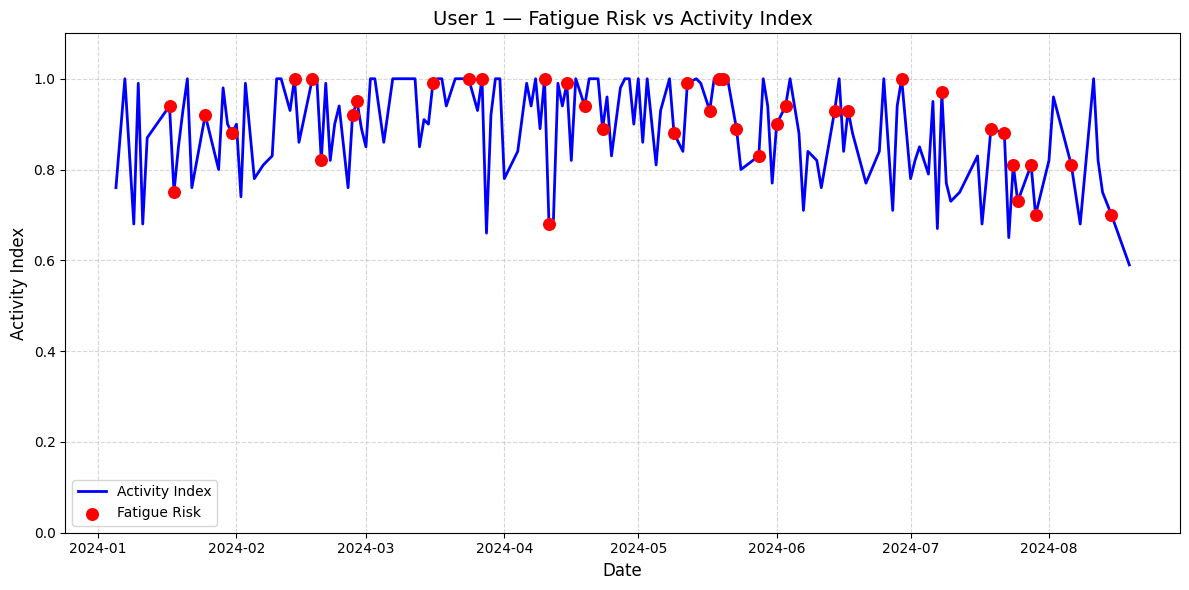

✅ Visualization complete for user 1.


In [50]:
# === Cell 9: Visualization of fatigue and activity index over time ===

import matplotlib.pyplot as plt
import pandas as pd

print("=== Visualizing fatigue and activity trends ===")

# --- 1️⃣ Ensure df_report is available ---
if 'df_report' not in locals():
    raise ValueError("❌ df_report not found — run previous cells first (e.g., Cell 8).")

# --- 2️⃣ Remove duplicate columns safely ---
if df_report.columns.duplicated().any():
    print("⚠️ Duplicate columns detected — keeping first occurrence of each.")
    df_report = df_report.loc[:, ~df_report.columns.duplicated()]

# --- 3️⃣ Handle missing, duplicated, or invalid date columns ---
date_cols = [col for col in df_report.columns if col.startswith("date")]
if len(date_cols) > 1:
    print(f"⚠️ Found multiple date columns: {date_cols} — keeping only '{date_cols[0]}'")
    df_report = df_report.drop(columns=date_cols[1:], errors="ignore")

if 'date' not in df_report.columns:
    print("⚠️ 'date' column missing — generating synthetic date sequence per user...")
    if 'user_id' not in df_report.columns:
        raise ValueError("❌ 'user_id' column is missing — cannot generate synthetic dates.")
    df_report = df_report.sort_values('user_id').reset_index(drop=True)

    synthetic_dates = []
    for user_id, group in df_report.groupby('user_id'):
        n = len(group)
        start_date = pd.Timestamp("2024-01-01") + pd.Timedelta(days=int(user_id))
        user_dates = pd.date_range(start=start_date, periods=n, freq='D')
        synthetic_dates.extend(user_dates)
    df_report['date'] = synthetic_dates
else:
    df_report['date'] = pd.to_datetime(df_report['date'], errors='coerce')

    all_nan = bool(df_report['date'].isna().all())
    if all_nan:
        print("⚠️ All 'date' values are NaN — regenerating synthetic dates...")
        synthetic_dates = []
        for user_id, group in df_report.groupby('user_id'):
            n = len(group)
            start_date = pd.Timestamp("2024-01-01") + pd.Timedelta(days=int(user_id))
            user_dates = pd.date_range(start=start_date, periods=n, freq='D')
            synthetic_dates.extend(user_dates)
        df_report['date'] = synthetic_dates

# --- 4️⃣ Select one user for visualization ---
if 'user_id' not in df_report.columns:
    raise ValueError("❌ 'user_id' column missing in df_report after cleaning!")

user_id = df_report['user_id'].iloc[0]
df_user = df_report[df_report['user_id'] == user_id].copy()

if df_user.empty:
    raise ValueError(f"❌ No data found for user {user_id}.")

# --- 5️⃣ Plot activity index and fatigue markers ---
plt.figure(figsize=(12, 6))
plt.plot(df_user['date'], df_user['activity_index'], label='Activity Index', color='blue', linewidth=2)

fatigue_days = df_user[df_user['fatigue_pred'] == 1]
if not fatigue_days.empty:
    plt.scatter(
        fatigue_days['date'],
        fatigue_days['activity_index'],
        color='red', s=70, label='Fatigue Risk', zorder=5
    )

# --- 6️⃣ Final styling ---
plt.title(f"User {int(user_id)} — Fatigue Risk vs Activity Index", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Activity Index", fontsize=12)
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

print(f"✅ Visualization complete for user {int(user_id)}.")
